## GeoPandas

First setp: imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import pandas as pd

## G7 Geocoding

Importing a shp file for the map

In [14]:
countries = gpd.read_file("data/TM_WORLD_BORDERS_SIMPL-0.3.shp")

G7 countries' geo information

In [15]:
places = gpd.tools.geocode(["Germany", "Italy", "France", "Japan", "United States", "UK", "Canada"], "nominatim").to_crs(countries.crs)
places

,address,geometry
0,"Deutschland, Europe",POINT (10.4234469 51.0834196)
1,Italia,POINT (12.674297 42.6384261)
2,"France métropolitaine, France",POINT (1.8883335 46.603354)
3,日本,POINT (139.2394179 36.5748441)
4,United States of America,POINT (-100.4458825 39.7837304)
5,UK,POINT (-3.2765753 54.7023545)
6,Canada,POINT (-107.9917071 61.0666922)


Spatial join to get a list:

In [16]:
origins = gpd.sjoin(places, countries, op = "within", how = 'left')
set(origins.FIPS)

{'CA', 'FR', 'GM', 'IT', 'JA', 'UK', 'US'}

Using `countries.FIPS.isin(origins)`:

In [17]:
ctrymask = countries.FIPS.isin(set(origins.FIPS))

### Plot:

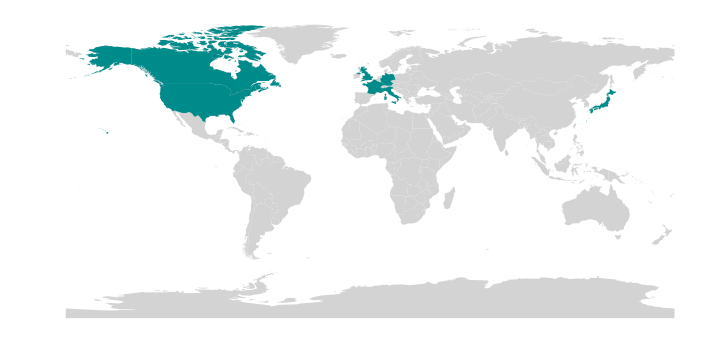

In [6]:
ax = countries.plot(color = "lightgrey", figsize = (12, 12))
countries[ctrymask].plot(ax = ax, color = "darkcyan")
ax.set_axis_off()
plt.savefig('G7.png')

## Latam Geocoding

Latin America countries' geo information. Sint Maarten and Virgin Islands are included in the dataset, but were excluded from the map because of the overlap with USA and France.

In [4]:
ltcountries = gpd.read_file("data/TM_WORLD_BORDERS_SIMPL-0.3.shp")

In [30]:
latam = gpd.tools.geocode(['Aruba', 'Argentina', 'Antigua and Barbuda', 'Bahamas', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Chile',
 'Colombia', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Dominica', 'Dominican Republic', 'Ecuador', 'Grenada', 'Guatemala', 'Guyana',
 'Honduras', 'Haiti', 'Jamaica', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin', 'Mexico', 'Nicaragua',
 'Panama South America', 'Peru South America', 'Puerto Rico', 'Paraguay', 'El Salvador', 'Suriname',
 'Turks and Caicos Islands', 'Trinidad and Tobago', 'Uruguay', 'St. Vincent and the Grenadines',
 'Venezuela', 'British Virgin Islands'], "nominatim").to_crs(ltcountries.crs)

latam

,address,geometry
0,"Aruba, Nederland",POINT (-69.9618475 12.5013629)
1,Argentina,POINT (-64.9672817 -34.9964963)
2,Antigua and Barbuda,POINT (-61.8222516 17.079128)
3,The Bahamas,POINT (-78.00005470000001 24.7736546)
4,Belize,POINT (-88.7600927 16.8259793)
5,Bolivia,POINT (-64.9912286 -17.0568696)
6,Brasil,POINT (-53.2 -10.3333333)
7,Barbados,POINT (-59.52503050000001 13.1500331)
8,Chile,POINT (-71.3187697 -31.7613365)
9,Colombia,POINT (-73.78389199999999 2.8894434)


Spatial join to get a list:

In [32]:
ltorigins = gpd.sjoin(latam, ltcountries, op = "within", how = 'left')
set(ltorigins.FIPS)

{nan,
 'VE',
 'ES',
 'DR',
 'HA',
 'ST',
 'AA',
 'HO',
 'SC',
 'BL',
 'CS',
 'PA',
 'CO',
 'UY',
 'PE',
 'BB',
 'DO',
 'BR',
 'GY',
 'NS',
 'NU',
 'JM',
 'CU',
 'GT',
 'AC',
 'AR',
 'RQ',
 'BH',
 'CI',
 'BF',
 'EC',
 'MX'}

Using `countries.FIPS.isin(origins)`:

In [33]:
lactrymask = ltcountries.FIPS.isin(set(ltorigins.FIPS))

### Plot:

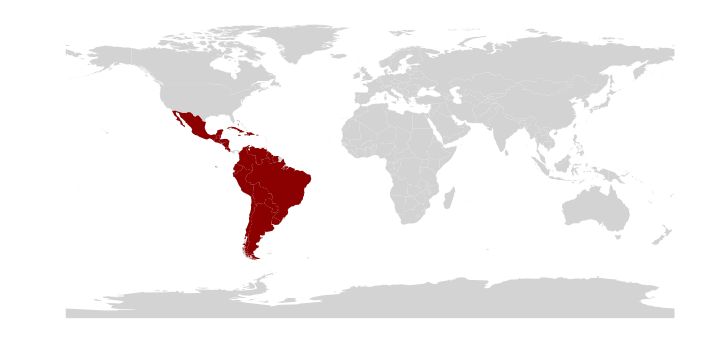

In [34]:
ax = ltcountries.plot(color = "lightgrey", figsize = (12, 12))
ltcountries[lactrymask].plot(ax = ax, color = "darkred")
ax.set_axis_off()
plt.savefig('latam.png')

### Interactive Web Map

In [62]:
import folium

m = folium.Map([40, 0], 
               tiles='cartodbpositron', 
               zoom_start=1, max_zoom=10, min_zoom=0)



folium.GeoJson(countries[ctrymask],
               style_function = lambda feature: { 
                  'fillColor': "darkcyan", "weight" : 1, "fillOpacity" : 0.4,
                   'color': "darkcyan"
               }).add_to(m)

folium.GeoJson(ltcountries[lactrymask],
               style_function = lambda feature: { 
                  'fillColor': "darkred", "weight" : 1, "fillOpacity" : 0.4,
                   "lineOpacity": 0.01,
                   'color': "darkred"
               }).add_to(m)

m.save("all.html")

m

In [ ]:
# How to plot just the Virgin Island instead of entire USA? delete that from the latam map and make a note.
# How to change the color of the borderlines? How to include this in the website?